In [1]:
#!/usr/bin/python
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from scipy.stats import linregress

warnings.simplefilter('ignore', FutureWarning)

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
x = np.array([2, 7])
y = np.array([5, 15])
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 2.000000, intercept: 1.000000
R-squared: 1.000000


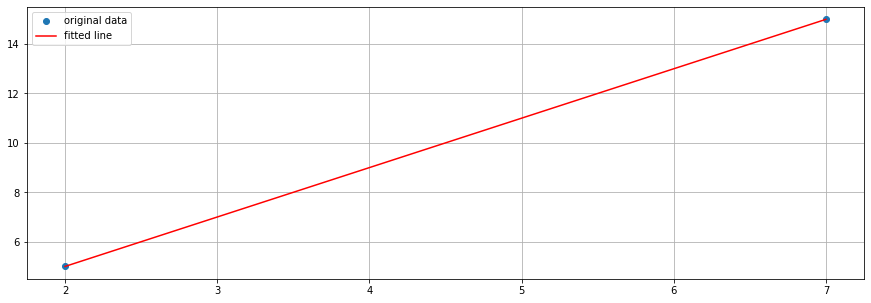

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

In [4]:
# fetch asset data
def getData(ticker, date_from, date_to):
    data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
    return data

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
Y|AAPL|Apple Inc. - Common Stock|Q|Q|N|100|N|N||AAPL|N  
Y|AMZN|Amazon.com, Inc. - Common Stock|Q|Q|N|100|N|N||AMZN|N  
Y|CCEP|Coca-Cola European Partners plc Ordinary Shares|N| |N|100|N||CCEP|CCEP|N  
Y|FB|Facebook, Inc. - Class A Common Stock|Q|Q|N|100|N|N||FB|N  
Y|JNJ|Johnson & Johnson Common Stock|N| |N|100|N||JNJ|JNJ|N  
Y|JWN|Nordstrom, Inc. Common Stock|N| |N|100|N||JWN|JWN|N  
Y|NVS|Novartis AG Common Stock|N| |N|100|N||NVS|NVS|N  
Y|PG|Procter & Gamble Company (The) Common Stock|N| |N|100|N||PG|PG|N  

In [5]:
# obtain Apple Inc stock price data and drop Adj Close column
date_from = datetime.date(2020, 1, 1)
date_to = datetime.date(2020, 8, 31)
df = getData('AAPL', date_from, date_to)
df.drop('Adj Close', axis=1, inplace=True)
df.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0


In [6]:
df_len = len(df)
df['Number'] = np.arange(df_len)+1
df_high = df.copy()
df_low = df.copy()
df.tail()

,High,Low,Open,Close,Volume,Number
Date,,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,164
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,165
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,166
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,167
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,168


In [7]:
while len(df_high)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_high['Number'], y=df_high['High'])
    df_high = df_high.loc[df_high['High'] > slope * df_high['Number'] + intercept]
    
df_high.tail()

,High,Low,Open,Close,Volume,Number
Date,,,,,,
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,8
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,168


In [8]:
while len(df_low)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_low['Number'], y=df_low['Low'])
    df_low = df_low.loc[df_low['Low'] < slope * df_low['Number'] + intercept]
    
df_low.tail()

,High,Low,Open,Close,Volume,Number
Date,,,,,,
2020-03-23,57.125000,53.152500,57.020000,56.092499,84188200.0,56
2020-07-24,92.970001,89.144997,90.987503,92.614998,185438800.0,142


In [9]:
slope, intercept, r_value, p_value, std_err = linregress(x=df_high['Number'], y=df_high['Close'])
df['Uptrend'] = slope * df['Number'] + intercept
df.tail()

,High,Low,Open,Close,Volume,Number,Uptrend
Date,,,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,164,127.794993
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,165,128.106243
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,166,128.417493
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,167,128.728743
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,168,129.039993


In [10]:
slope, intercept, r_value, p_value, std_err = linregress(x=df_low['Number'], y=df_low['Close'])
df['Downtrend'] = slope * df['Number'] + intercept
df.tail()

,High,Low,Open,Close,Volume,Number,Uptrend,Downtrend
Date,,,,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,164,127.794993,101.957963
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,165,128.106243,102.382643
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,166,128.417493,102.807323
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,167,128.728743,103.232003
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,168,129.039993,103.656684


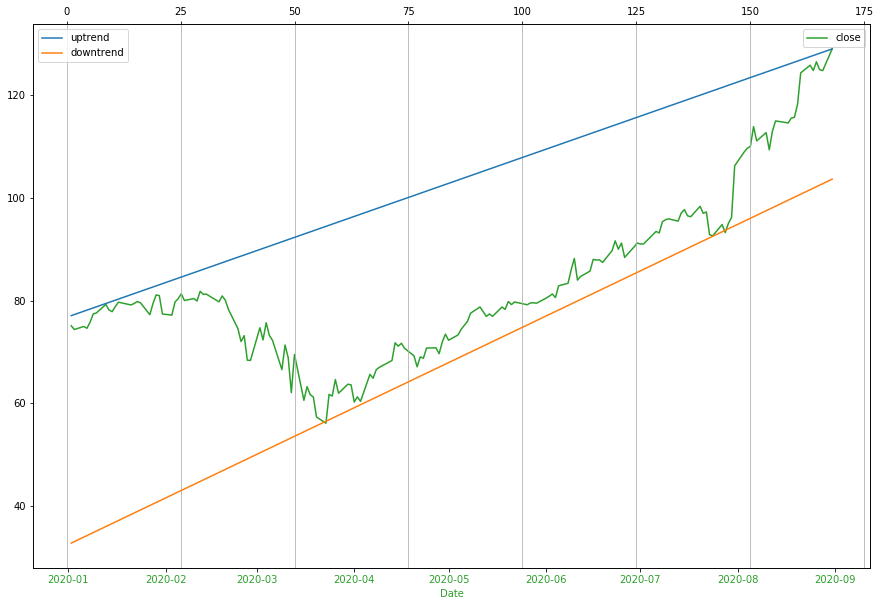

In [11]:
# draw the closing price and related trendlines (uptrend and downtrend)
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:green'
xdate = [x.date() for x in df.index]
ax1.set_xlabel('Date', color=color)
ax1.plot(xdate, df.Close, label="close", color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.legend()

ax2 = ax1.twiny() # ax2 and ax1 will have common y axis and different x axis, twiny
ax2.plot(df.Number, df.Uptrend, label="uptrend")
ax2.plot(df.Number, df.Downtrend, label="downtrend")

plt.legend()
plt.grid()
plt.show()